In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
from matplotlib import cm

## Generate 150 random points, in 3 regions

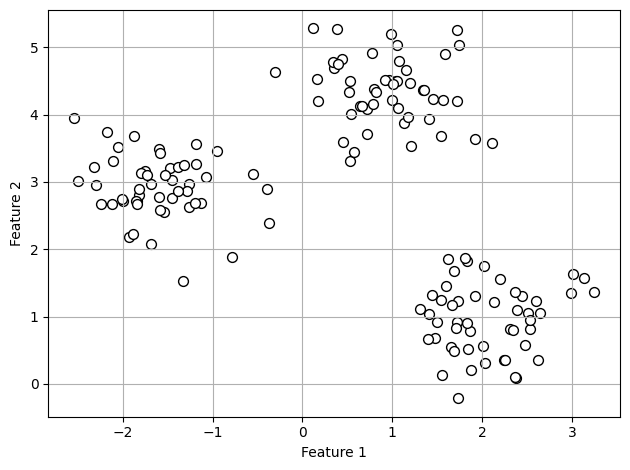

In [2]:
def gen_clusters(n_samples, centers):
    X, y = make_blobs(n_samples=n_samples, n_features=2, centers=centers,
        cluster_std=0.5, shuffle=True, random_state=0)

    plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', edgecolor='black', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid()
    plt.tight_layout()
    plt.show()
    return X, y

X, y = gen_clusters(150, 3)

## Run KMeans, w/ the desired number of centroids

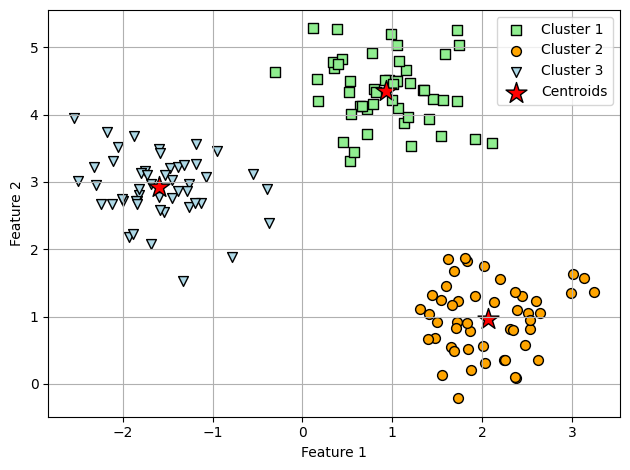

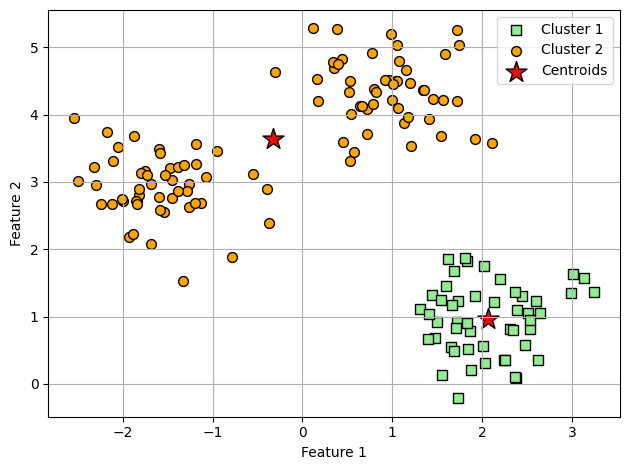

In [3]:
def run_kmeans(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='random',
        n_init=10, max_iter=300, tol=1e-04, random_state=0)
    y_km = km.fit_predict(X)

    plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
        s=50, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
    plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
        s=50, c='orange', marker='o', edgecolor='black', label='Cluster 2')
    if n_clusters>=3:
        plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1],
            s=50, c='lightblue', marker='v', edgecolor='black', label='Cluster 3')
    plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
        s=250, marker='*', c='red', edgecolor='black', label='Centroids')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.tight_layout()
    plt.show()

run_kmeans(3)
run_kmeans(2)

<br>

## Find optimal number of clusters w/ elbow method

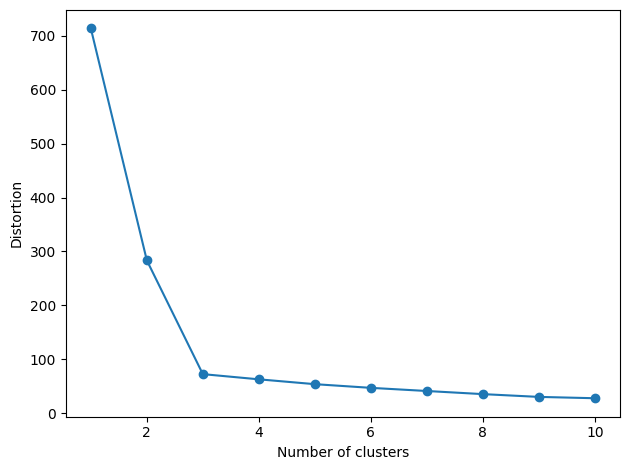

In [4]:
def show_elbow_plot(X, max_clusters):
    distortions = []
    for i in range(1, max_clusters):
        km = KMeans(n_clusters=i, init='k-means++',
            n_init=10, max_iter=300, random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1, 11), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.tight_layout()
    plt.show()

show_elbow_plot(X, 11)

<br>

## Quantify quality of clusters w/ silhouette plots

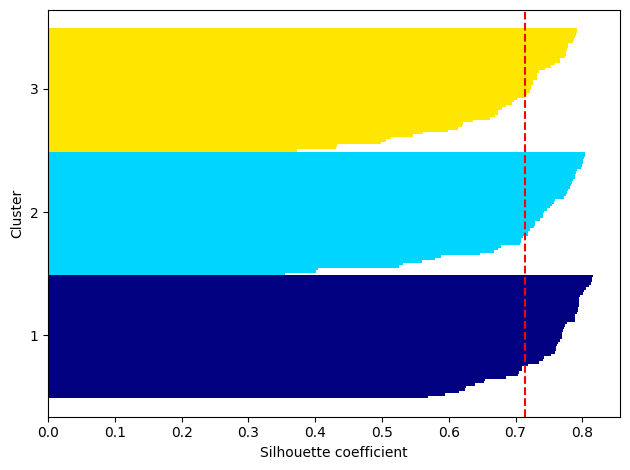

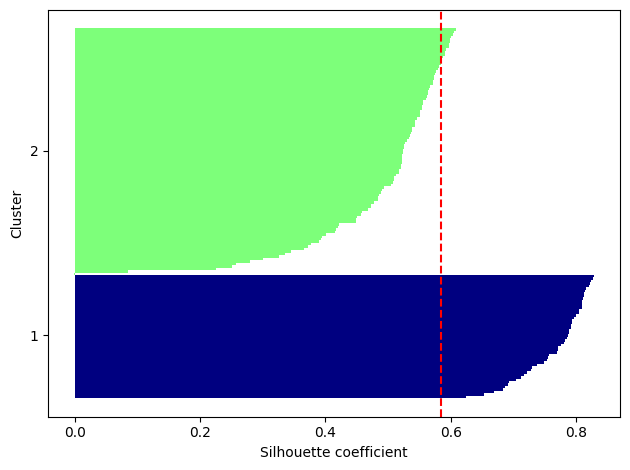

In [5]:
def show_silhouette_plot(X, n_clusters):
    km = KMeans(n_clusters, init='k-means++',
        n_init=10, max_iter=300, tol=1e-04, random_state=0)
    y_km = km.fit_predict(X)

    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
            c_silhouette_vals, height=1.0, edgecolor='none', color=color)

        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
        
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--") 
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    plt.show()

show_silhouette_plot(X, 3)
show_silhouette_plot(X, 2)

## Alternative: Show Elbow Plot and Silhouette Plot with Scikit-Plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


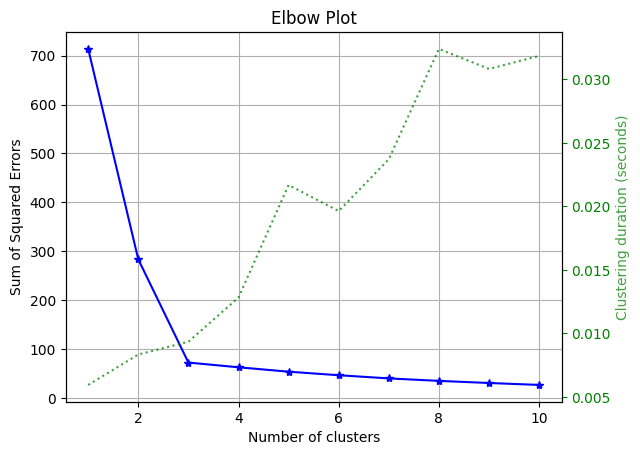

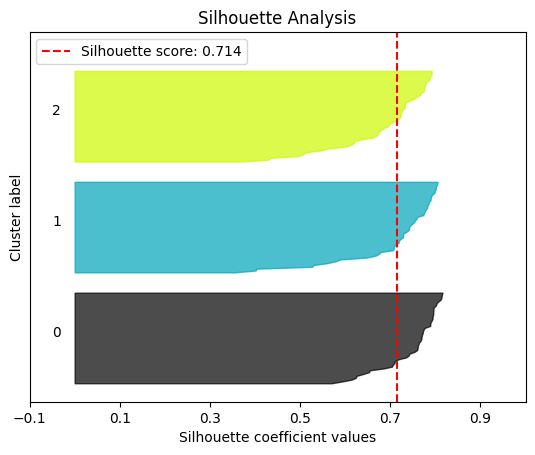

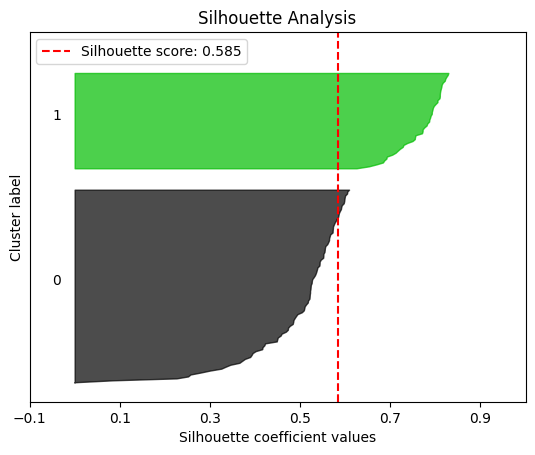

In [7]:
!pip install scikit-plot
import scikitplot as skplt

km = KMeans(n_clusters=11, n_init=10)
skplt.cluster.plot_elbow_curve(km, X, cluster_ranges=range(1, 11))
plt.show()

km = KMeans(n_clusters=3, n_init=10)
y_km = km.fit_predict(X)
skplt.metrics.plot_silhouette(X, y_km)
plt.show()

km = KMeans(n_clusters=2, n_init=10)
y_km = km.fit_predict(X)
skplt.metrics.plot_silhouette(X, y_km)
plt.show()